# Setup: read the packages we need

In [39]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
pandas.set_option('display.max_colwidth', -1)
datadir = '/home/idies/workspace/Storage/raddick/musical_folksonomy/data/firstpass/'
intermediate_datadir = datadir + 'intermediate_data/'

debug = 1

print('imported')

imported


# Setup: read parsed filenames into a dataframe

In [2]:
df = pandas.read_csv(datadir+'filenames_firstpass_complete.csv', encoding='utf-8', index_col='id')
print('Read {0:,.0f} rows!'.format(len(df)))
print('Converting empty date format values to nodate for {0:,.0f} rows...'.format(len(df[df['date_format'].isnull()])))
df.loc[df['date_format'].isnull(), 'date_format'] = 'nodate'
print('Converting dates to datetime...')
df.loc[:, 'thedate'] = pandas.to_datetime(df['thedate'], errors='coerce')
print('backing up...')
df_bk = df
print('Done!')
df.columns

Read 2,972 rows!
Converting empty date format values to nodate for 1,423 rows...
Converting dates to datetime...
backing up...
Done!


Index(['tracker_site', 'filename', 'filetype', 'stem', 'date_string',
       'thedate', 'justyear', 'justmonth', 'date_format', 'band_string',
       'band_string_right_before_date_string', 'band', 'abbrev_type'],
      dtype='object')

# Summary statistics!

## What tracker sites do filenames come from?

In [3]:
df.groupby('tracker_site').size().sort_values(ascending=False)

tracker_site
DimeaDozen      1803
Etree           564 
TradersDen      330 
LosslessLegs    275 
dtype: int64

## What file types?

In [4]:
df.groupby('filetype').size().sort_values(ascending=False)

filetype
flac    2799
shn     92  
mp2     48  
mp3     31  
wav     1   
aud     1   
dtype: int64

## What date formats?

In [5]:
df.groupby('date_format').size().sort_values(ascending=False)

date_format
nodate           1423
yyyy-mm-dd       1175
yy-mm-dd         131 
eightnumbers     97  
byhand           63  
otherseps        56  
justyear         17  
justyearmonth    10  
dtype: int64

## For files with known year, what years?

getting from backup...
Found 1,548 rows with year given...


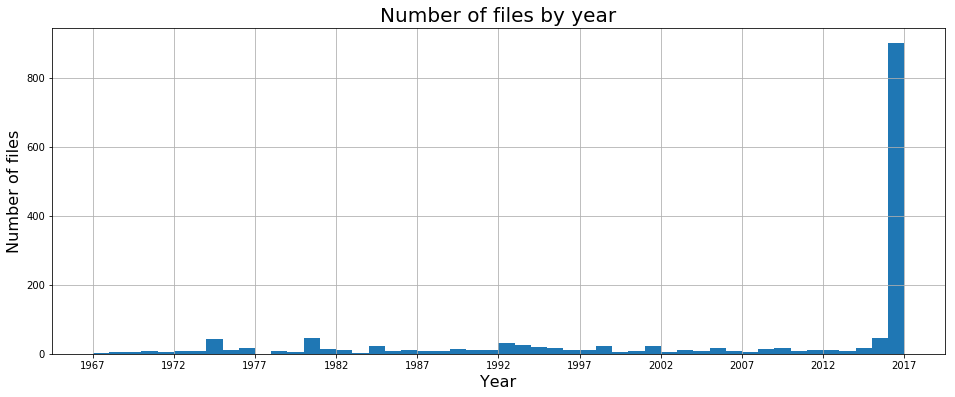

theyear
2017.0    5  
2016.0    895
2015.0    45 
2014.0    18 
2013.0    9  
2012.0    12 
2011.0    12 
2010.0    8  
2009.0    16 
2008.0    14 
2007.0    6  
2006.0    7  
2005.0    16 
2004.0    9  
2003.0    10 
2002.0    6  
2001.0    24 
2000.0    7  
1999.0    4  
1998.0    24 
1997.0    10 
1996.0    12 
1995.0    16 
1994.0    19 
1993.0    26 
1992.0    30 
1991.0    12 
1990.0    11 
1989.0    13 
1988.0    8  
1987.0    7  
1986.0    11 
1985.0    7  
1984.0    22 
1983.0    2  
1982.0    11 
1981.0    14 
1980.0    45 
1979.0    5  
1978.0    7  
1976.0    17 
1975.0    12 
1974.0    43 
1973.0    8  
1972.0    9  
1971.0    4  
1970.0    9  
1969.0    5  
1968.0    5  
1967.0    1  
dtype: int64

In [6]:
print('getting from backup...')
df = df_bk

df = df.assign(theyear = pandas.to_numeric(df['thedate'].dropna().apply(lambda x: x.year), errors='coerce'))
df.loc[df['justyear'].notnull(), 'theyear'] = df['justyear']

print('Found {0:,.0f} rows with year given...'.format(len(df[df['theyear'].notnull()])))

fig, ax = plt.subplots(1, 1, figsize=(16,6))

#df[df['theyear'] <= 2015]['theyear'].hist(bins=48)
df['theyear'].hist(bins=50)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of files', fontsize=16)
plt.xticks(np.arange(1967,2018,5))
plt.title('Number of files by year', fontsize=20)
plt.show()
df.groupby('theyear').size().sort_index(ascending=False)

## For files with known months, what months?

1.0 = January, 2.0 = February, etc.

In [7]:
print('getting from backup...')
df = df_bk

df = df.assign(themonth = pandas.to_numeric(df['thedate'].dropna().apply(lambda x: x.month), errors='coerce'))
df.loc[df['justmonth'].notnull(), 'themonth'] = df['justmonth']

df.groupby('themonth').size().sort_index()

getting from backup...


themonth
1.0     33 
2.0     58 
3.0     73 
4.0     69 
5.0     70 
6.0     249
7.0     664
8.0     61 
9.0     59 
10.0    46 
11.0    79 
12.0    70 
dtype: int64

## Does the band string immediately proceed the date string?

In [8]:
df.groupby('band_string_right_before_date_string').size().sort_values()

band_string_right_before_date_string
True     1009
False    1963
dtype: int64

## What are the band abbreviation types?

In [11]:
showorder = ['canonical', 'variant etree', 'variant archive.org', 'incorrect']
showorder += ['notfound', 'composer', 'likelysong', 'unknown', 'notband', 'blank']
df.groupby('abbrev_type').size().reindex(showorder)

abbrev_type
canonical              351 
variant etree          20  
variant archive.org    97  
incorrect              87  
notfound               1392
composer               11  
likelysong             259 
unknown                77  
notband                238 
blank                  440 
dtype: int64

### Show a sample filename from each abbreviation type

In [52]:
#df.groupby('abbrev_type')['filename'].apply(lambda s: s.sample(1))

#df['abbrev_type'].drop_duplicates().values.tolist()   # VALUES
htmlstring = ''
htmlstring += '<h4>Count and sample filename for each abbreviation type</h4>'
htmlstring += '<table>'
htmlstring += '<tr><th>Abbrevation type</th><th>File count</th><th>Sample filename</th></tr>'

showorder = ['canonical', 'variant etree', 'variant archive.org', 'incorrect']
showorder += ['notfound', 'composer', 'likelysong', 'unknown', 'notband', 'blank']

for thistype in showorder:
    htmlstring += '<tr>'
    htmlstring += '<td>{:}</td>'.format(thistype)
    htmlstring += '<td>{:,.0f}</td>'.format(len(df[df['abbrev_type'] == thistype]))
    htmlstring += '<td>{:}</td>'.format(df['filename'][df['abbrev_type'] == thistype].sample(1).values[0])
    htmlstring += '</tr>'

htmlstring += '</table>'
    #print(df['filename'][df['abbrev_type'] == thistype].sample(1).values[0])
    
display(HTML(htmlstring))



Abbrevation type,File count,Sample filename
canonical,351,gd74-10-16d1t01.flac
variant etree,20,jg1974-12-07.gs.aud.castelli.menke.motb.d1t01.flac
variant archive.org,97,MMW2016-07-22Red RocksTelefunken M6001.flac
incorrect,87,jackie2016-07-22d01t09.flac
notfound,"1,392",010 House of Clocks.flac
composer,11,01 John Cage - Five.flac
likelysong,259,10-Sunday Bloody Sunday.flac
unknown,77,jason2016-07-23d01t14.flac
notband,238,101 Opening S.E..flac
blank,440,d1t01.flac


## Which bands are represented?

In [55]:
df[df['band'] != 'notband'].groupby('band').size().sort_values(ascending=False)

band
Grateful Dead                   136
Phish                           120
unknown                         77 
Widespread Panic                56 
Dead & Company                  47 
Bob Dylan                       25 
Jerry Garcia & Merl Saunders    25 
Neil Young                      19 
Pearl Jam                       17 
Dean Monkey & The Dropouts      15 
Tedeschi Trucks Band            15 
Los Lobos                       15 
Jerry Garcia                    13 
The Jam                         13 
Chris Robinson Brotherhood      11 
U2                              11 
Jefferson Starship              11 
Greensky Bluegrass              11 
Dave Matthews Band              9  
Unknown Artist                  9  
Radiohead                       9  
Larry Carlton                   8  
Jerry Garcia Band               8  
Wilco                           8  
North Mississippi Allstars      7  
The Who                         7  
Dread Clampitt                  7  
Steve Marriott         